# ***Visualization of Categorical & Continous Data***

In [ ]:
import pandas as pd,matplotlib.pyplot as plt,seaborn as sns,numpy as np,warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/adultdata.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info() # checking data types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe() # stats of the dataset

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum().sum() #Null values finder

0

In [ ]:
df=df.drop(columns=["occupation","relationship","marital-status","native-country"],axis=0)
df.head()

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,13,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Black,Female,0,0,40,<=50K


# ***Exploratory Data Analysis***

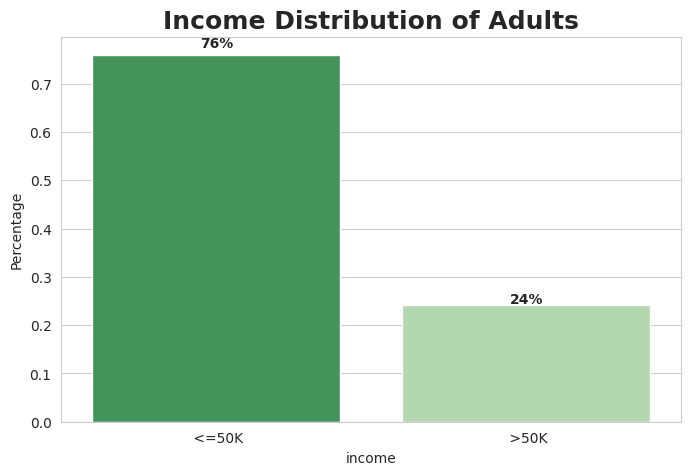

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['salary'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x<18):
      return "Under 18"
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

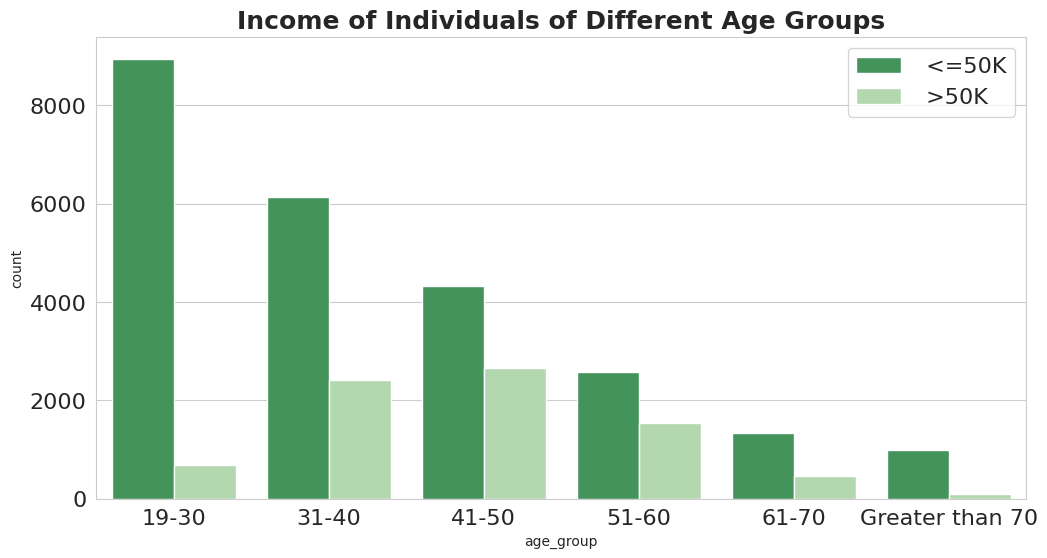

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

# Melt the dataframe to convert it to long-form
df_melted = df.melt(id_vars=['age_group'], value_vars=['salary'])

# Now use the melted dataframe for the countplot
sns.countplot(x='age_group', hue='value', data=df_melted, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

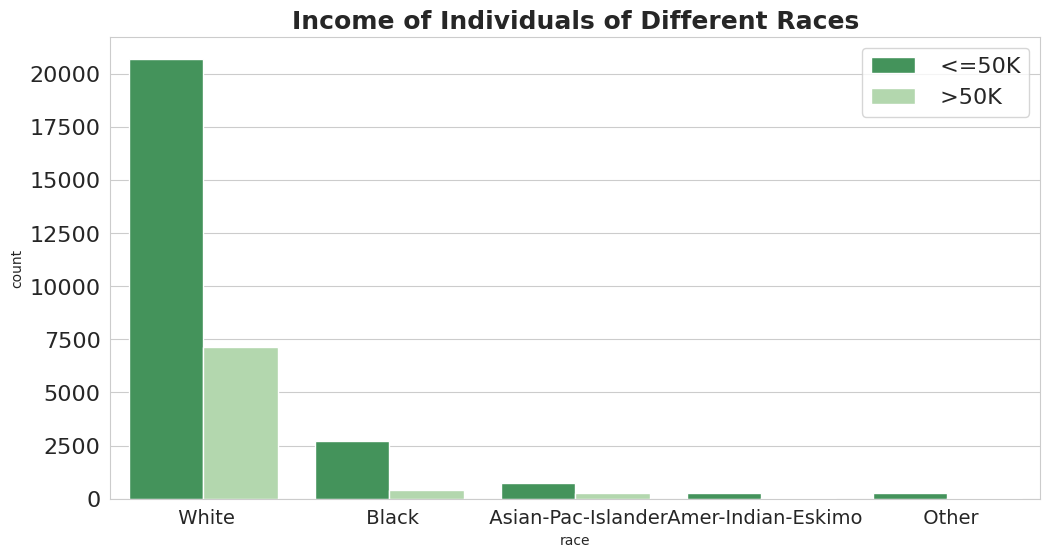

In [ ]:
# Melt the dataframe to convert it to long-form
df_melted = df.melt(id_vars=['race'], value_vars=['salary'])

# Now use the melted dataframe for the countplot
plt.figure(figsize=(12,6))
sns.countplot(x='race', hue='value', data=df_melted, palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

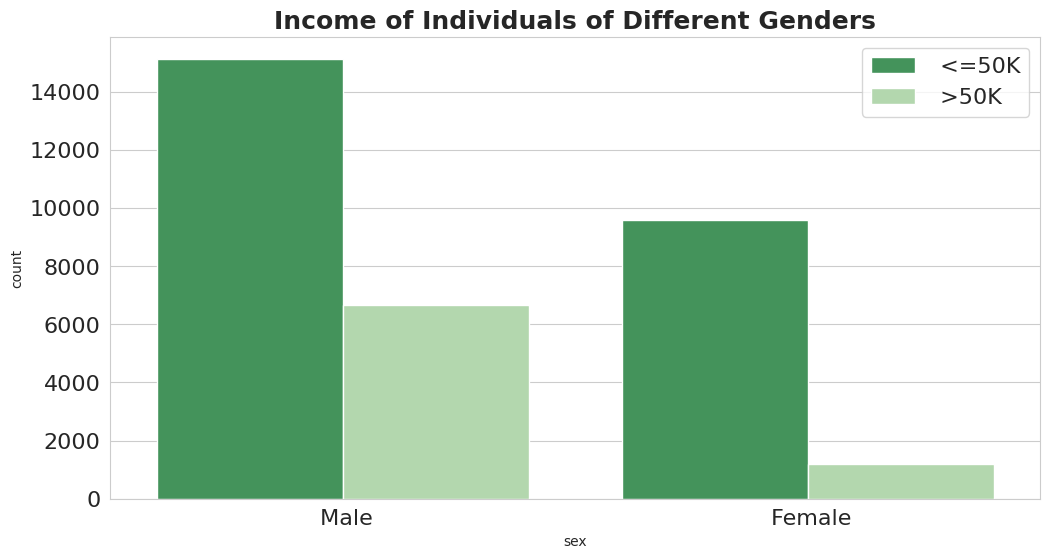

In [ ]:
# Melt the dataframe to convert it to long-form
df_melted = df.melt(id_vars=['sex'], value_vars=['salary'])

# Now use the melted dataframe for the countplot
plt.figure(figsize=(12,6))
sns.countplot(x='sex', hue='value', data=df_melted, palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

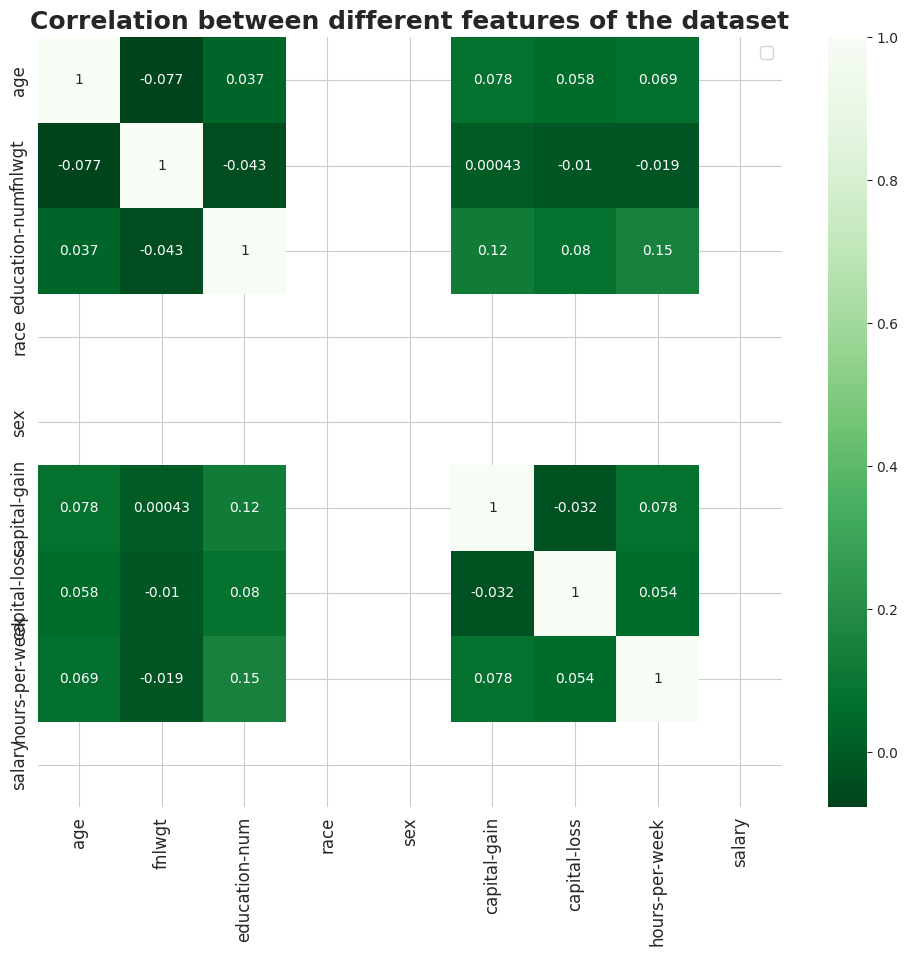

In [ ]:
df=df.drop(columns=["age_group"],axis=0)
df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1})
df['race']=df['race'].map({'Black': 0, 'White': 1})
df['sex']=df['sex'].map({'Female': 0, 'Male': 1})
abc=df.drop(columns=["education","workclass"],axis=0)
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(abc.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)